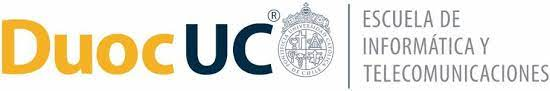

# Evaluación 2 - Etiquetado de Imágenes para Gobierno de Chile (Forma C)

Nombre Grupo: **Los Convolucionales**

Integrantes: 
*   **Cristóbal Cabezas Espinoza**
*   **Jorge López Soto**

Docente: Marco Antonio Japke Adriasola

Sección: DLY0100-003V

## 1. BUSSINESS UNDERSTANDING

## 2. DATA UNDERSTANDING

In [1]:
# Importamos librerias
from tensorflow import keras
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from keras.optimizers import SGD, Adam
from keras.layers import Flatten
from keras import callbacks

2024-05-08 19:51:33.433194: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 19:51:33.509909: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 19:51:33.785690: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 19:51:34.939057: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Cargamos nuestro dataset, el cual lo importamos de la libreria de keras
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Nuestro dataset cuenta con 50000 imágenes, cada una de un tamaño de 32x32. 

In [3]:
# Con esta lista etiquetamos las clases de las imagenes
nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

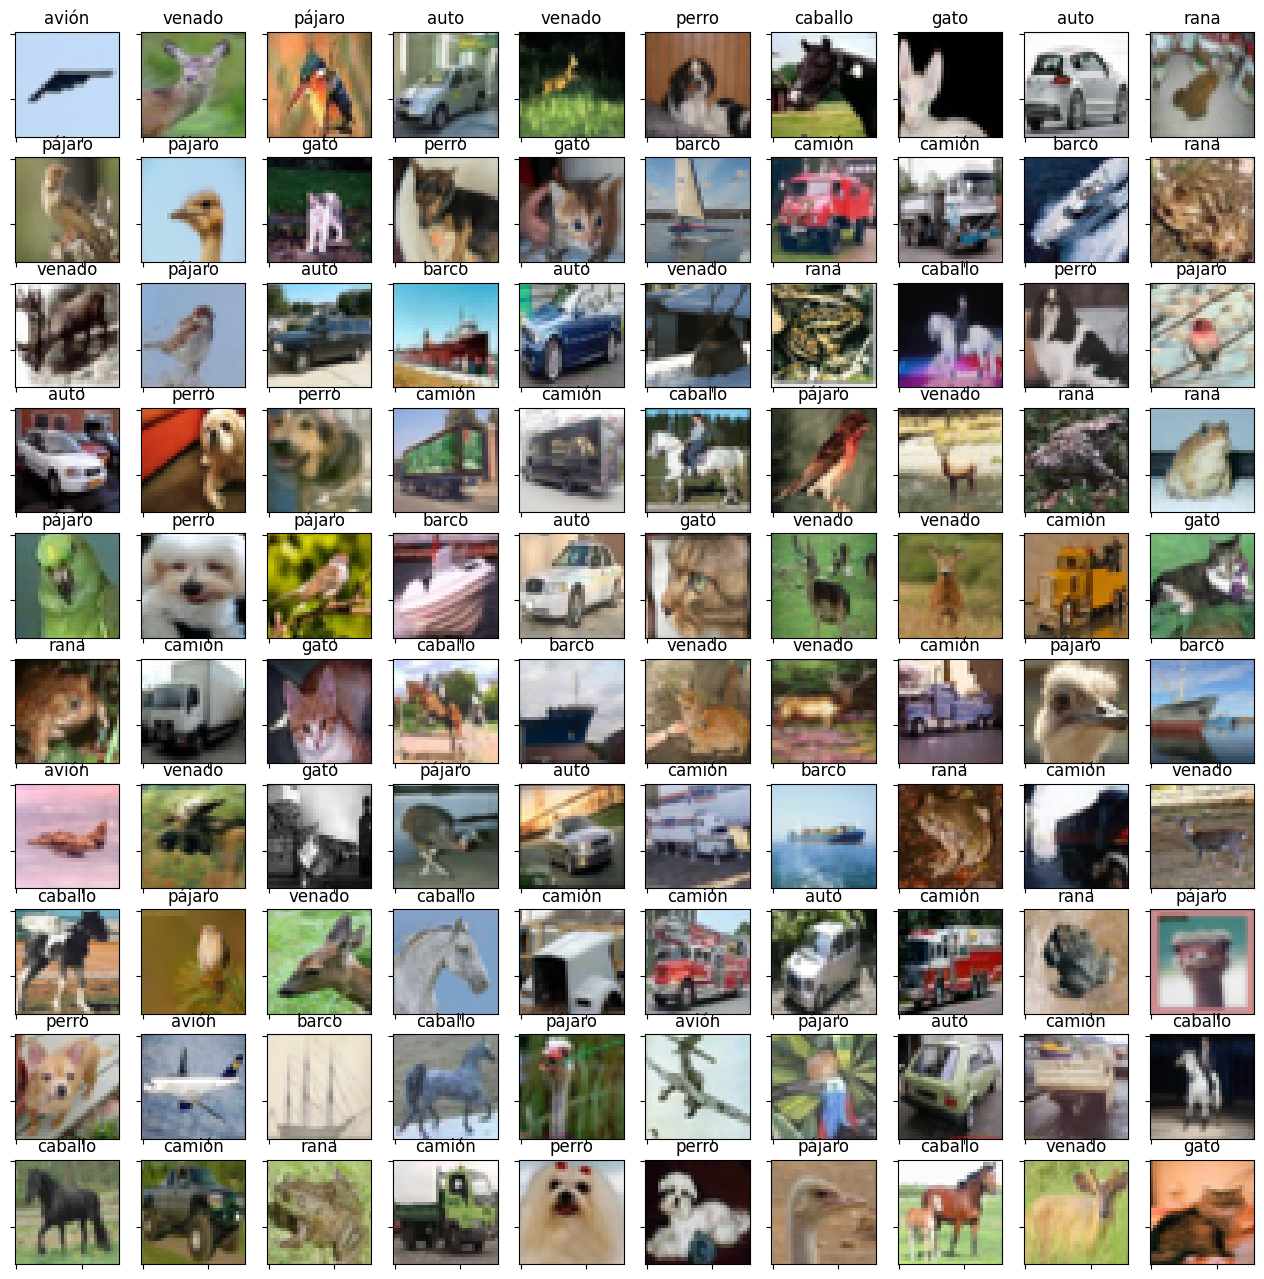

In [4]:
# Mostramos una grilla de ejemplos (al azar)

h = 10 # alto de la grilla
w = 10 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_test))
    axs[i,j].set_title(nombres[labs_test[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_test[ex])

## 3. DATA PREPARATION

In [5]:
# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [6]:
# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

3072 10 50000 10000


In [7]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

In [8]:
# tamaños de capas escondidas

h1 = 512
h2 = 256
h3 = 256

## 4. MODELING

### 4.1. Implementación de Red Feed Fordward Fully Connected (MLP) 


Importar librerías necesarias, lectura de archivos, implementación y construcción de la red neuronal artificial.

Probar con diferentes funciones de activación y elegir alguna justificando su decisión. Modificar la cantidad de capas, la cantidad de épocas y neuronas por capa y registrar a continuación algunos resultados de la ejecución con sus respectivos hiperparámetros.

#### 4.1.1. MODELO 1 - **SGD**

##### 4.1.1.1 *SGD - ReLu*

###### 4.1.1.1.1. 1 Capa

In [11]:
# nuestra red feed-forward

model_sgd_relu_1 = keras.Sequential()
model_sgd_relu_1.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd_relu_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_relu_1.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#sgd=SGD(learning_rate=0.01)
model_sgd_relu_1.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_relu_1 = model_sgd_relu_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50


2024-05-06 23:00:20.457348: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1865 - loss: 2.2110 

2024-05-06 23:00:22.017572: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1873 - loss: 2.2091 - val_accuracy: 0.2640 - val_loss: 2.0042
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3014 - loss: 1.9747 - val_accuracy: 0.3113 - val_loss: 1.9140
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3343 - loss: 1.8979 - val_accuracy: 0.3343 - val_loss: 1.8602
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3554 - loss: 1.8497 - val_accuracy: 0.3526 - val_loss: 1.8222
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3733 - loss: 1.8139 - val_accuracy: 0.3632 - val_loss: 1.7932
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3822 - loss: 1.7855 - val_accuracy: 0.3753 - val_loss: 1.7673
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3907 - loss: 1.7618 - val_accuracy: 0.3822 - val_loss: 1.7463
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3969 - loss: 1.7409 - val_accuracy: 0.391

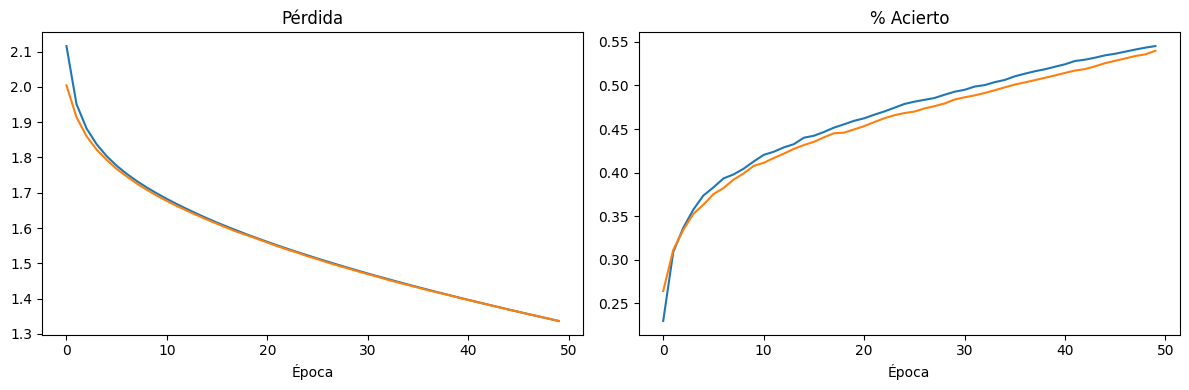

In [13]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_relu_1.history['accuracy'])
plt.plot(h_sgd_relu_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_relu_1.history['loss'])
plt.plot(h_sgd_relu_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.1.2. 2 Capas

In [14]:
# nuestra red feed-forward

model_sgd_relu_2 = keras.Sequential()
model_sgd_relu_2.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd_relu_2.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_sgd_relu_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_relu_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#sgd=SGD(learning_rate=0.01)
model_sgd_relu_2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_relu_2 = model_sgd_relu_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50


2024-05-06 23:01:21.857838: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


 98/100 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1865 - loss: 2.2218

2024-05-06 23:01:23.257168: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1878 - loss: 2.2193 - val_accuracy: 0.2667 - val_loss: 2.0299
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2939 - loss: 1.9947 - val_accuracy: 0.3057 - val_loss: 1.9352
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3284 - loss: 1.9150 - val_accuracy: 0.3307 - val_loss: 1.8785
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3457 - loss: 1.8629 - val_accuracy: 0.3473 - val_loss: 1.8373
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3632 - loss: 1.8244 - val_accuracy: 0.3611 - val_loss: 1.8027
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3805 - loss: 1.7919 - val_accuracy: 0.3747 - val_loss: 1.7744
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3922 - loss: 1.7650 - val_accuracy: 0.3842 - val_loss: 1.7493
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3985 - loss: 1.7407 - val_accuracy: 0.394

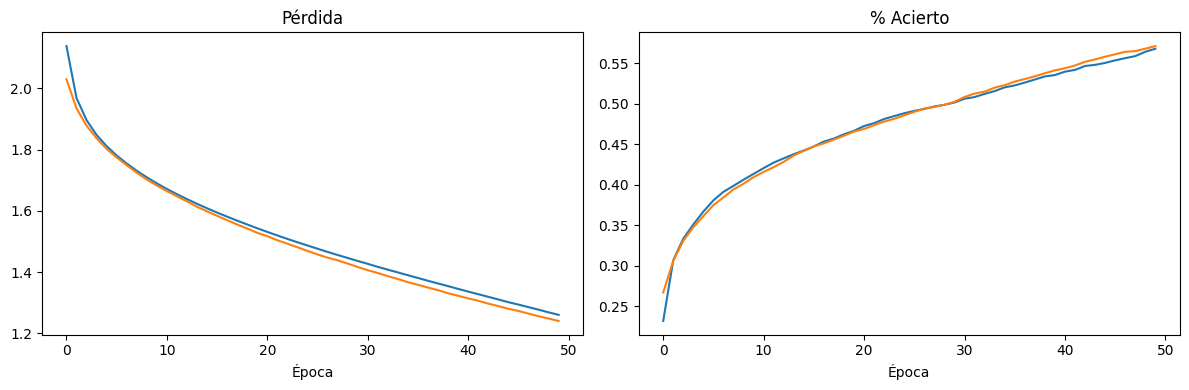

In [16]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_relu_2.history['accuracy'])
plt.plot(h_sgd_relu_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_relu_2.history['loss'])
plt.plot(h_sgd_relu_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.1.3. 3 Capas

In [17]:
# nuestra red feed-forward

model_sgd_relu_3 = keras.Sequential()
model_sgd_relu_3.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd_relu_3.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_sgd_relu_3.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
model_sgd_relu_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_relu_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#sgd=SGD(learning_rate=0.01)
model_sgd_relu_3.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_relu_3 = model_sgd_relu_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50


2024-05-06 23:02:26.997554: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1585 - loss: 2.2586 - val_accuracy: 0.2431 - val_loss: 2.0762
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2755 - loss: 2.0378 - val_accuracy: 0.2942 - val_loss: 1.9618
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3131 - loss: 1.9448 - val_accuracy: 0.3206 - val_loss: 1.9007
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3331 - loss: 1.8916 - val_accuracy: 0.3356 - val_loss: 1.8556
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3450 - loss: 1.8512 - val_accuracy: 0.3495 - val_loss: 1.8189
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3553 - loss: 1.8175 - val_accuracy: 0.3614 - val_loss: 1.7887
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3686 - loss: 1.7878 - val_accuracy: 0.3717 - val_loss: 1.7644
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3787 - loss: 1.7621 - val_accuracy: 0.379

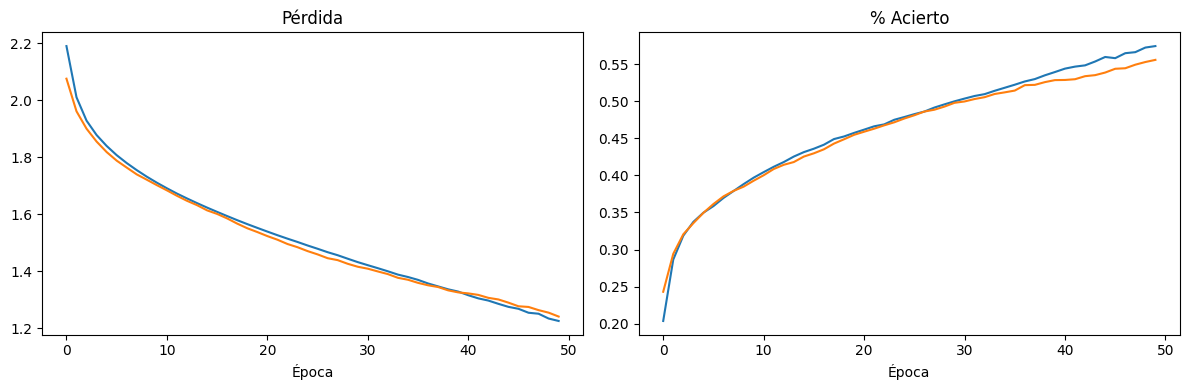

In [19]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_relu_3.history['accuracy'])
plt.plot(h_sgd_relu_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_relu_3.history['loss'])
plt.plot(h_sgd_relu_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 4.1.1.2. *SGD - Tanh*

###### 4.1.1.2.1. 1 Capa

In [20]:
model_sgd_tanh_1 = keras.Sequential()
model_sgd_tanh_1.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_sgd_tanh_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#sgd=SGD(learning_rate=0.01)
model_sgd_tanh_1.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_tanh_1 = model_sgd_tanh_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1868 - loss: 2.2156 - val_accuracy: 0.2681 - val_loss: 1.9978
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2995 - loss: 1.9707 - val_accuracy: 0.3097 - val_loss: 1.9117
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3287 - loss: 1.8988 - val_accuracy: 0.3331 - val_loss: 1.8638
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3467 - loss: 1.8567 - val_accuracy: 0.3499 - val_loss: 1.8311
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3600 - loss: 1.8270 - val_accuracy: 0.3650 - val_loss: 1.8064
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3680 - loss: 1.8039 - val_accuracy: 0.3736 - val_loss: 1.7863
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3761 - loss: 1.7847 - val_accuracy: 0.3789 - val_loss: 1.7691
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3809 - loss: 1.7682 - val_accu

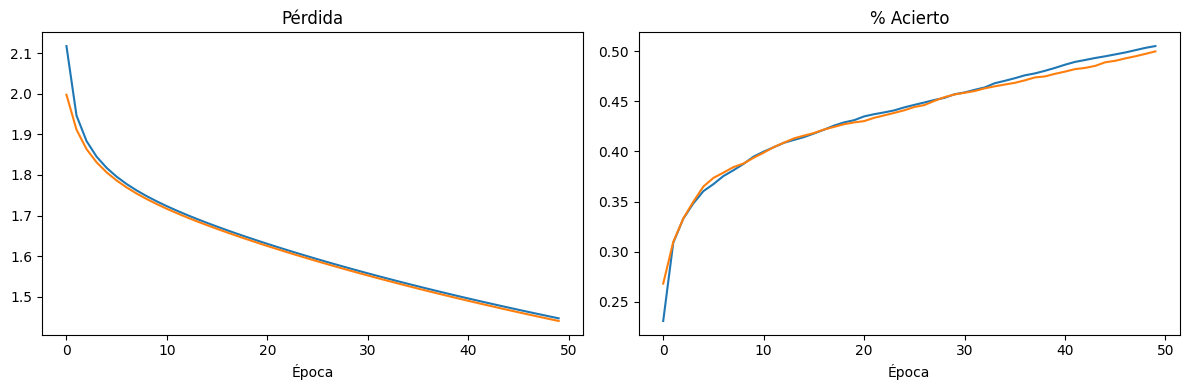

In [22]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh_1.history['accuracy'])
plt.plot(h_sgd_tanh_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh_1.history['loss'])
plt.plot(h_sgd_tanh_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.2.2. 2 Capas

In [23]:
model_sgd_tanh_2 = keras.Sequential()
model_sgd_tanh_2.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_sgd_tanh_2.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_sgd_tanh_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#sgd=SGD(learning_rate=0.01)
model_sgd_tanh_2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_tanh_2 = model_sgd_tanh_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1890 - loss: 2.2000 - val_accuracy: 0.2831 - val_loss: 1.9780
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3103 - loss: 1.9486 - val_accuracy: 0.3256 - val_loss: 1.8871
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3392 - loss: 1.8747 - val_accuracy: 0.3466 - val_loss: 1.8366
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3585 - loss: 1.8308 - val_accuracy: 0.3619 - val_loss: 1.8012
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3724 - loss: 1.7989 - val_accuracy: 0.3762 - val_loss: 1.7735
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3798 - loss: 1.7732 - val_accuracy: 0.3863 - val_loss: 1.7504
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3882 - loss: 1.7515 - val_accuracy: 0.3931 - val_loss: 1.7302
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3947 - loss: 1.7324 - val_accu

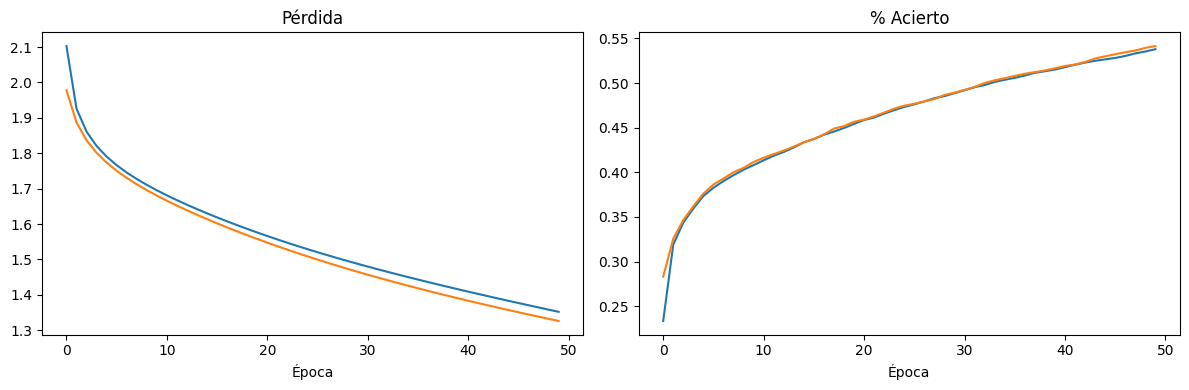

In [25]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh_2.history['accuracy'])
plt.plot(h_sgd_tanh_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh_2.history['loss'])
plt.plot(h_sgd_tanh_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.2.3. 3 Capas

In [26]:
# nuestra red feed-forward

model_sgd_tanh_3 = keras.Sequential()
model_sgd_tanh_3.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_sgd_tanh_3.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_sgd_tanh_3.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
model_sgd_tanh_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#sgd=SGD(learning_rate=0.01)
model_sgd_tanh_3.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_tanh_3 = model_sgd_tanh_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1741 - loss: 2.2239 - val_accuracy: 0.2665 - val_loss: 1.9969
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3084 - loss: 1.9576 - val_accuracy: 0.3138 - val_loss: 1.8996
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3379 - loss: 1.8803 - val_accuracy: 0.3386 - val_loss: 1.8474
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3594 - loss: 1.8349 - val_accuracy: 0.3546 - val_loss: 1.8107
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3732 - loss: 1.8015 - val_accuracy: 0.3675 - val_loss: 1.7815
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3820 - loss: 1.7746 - val_accuracy: 0.3761 - val_loss: 1.7566
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3876 - loss: 1.7520 - val_accuracy: 0.3832 - val_loss: 1.7346
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3957 - loss: 1.7322 - val_accu

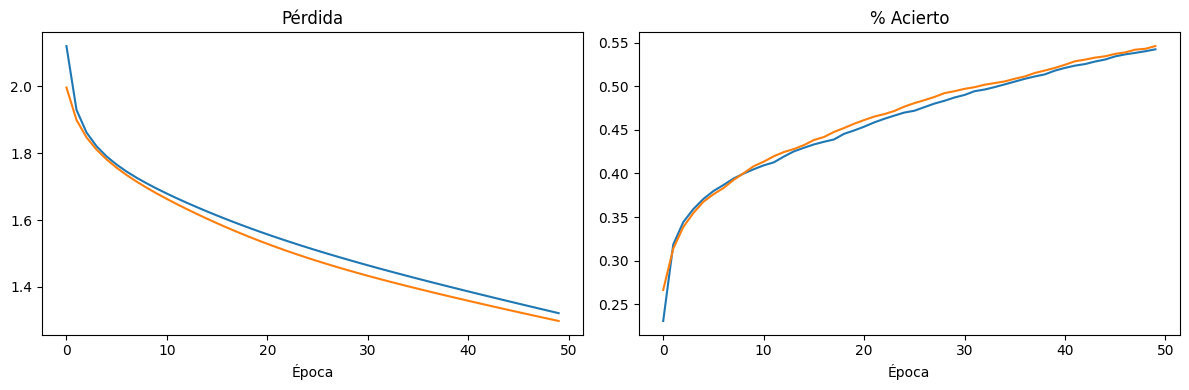

In [28]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh_3.history['accuracy'])
plt.plot(h_sgd_tanh_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh_3.history['loss'])
plt.plot(h_sgd_tanh_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.1.1.3. *SGD - Sigmoid*

###### 4.1.1.3.1. 1 Capa

In [29]:
model_sgd_tanh_1 = keras.Sequential()
model_sgd_tanh_1.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_sgd_tanh_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
sgd=SGD(learning_rate=0.01)
model_sgd_tanh_1.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)

h_sgd_tanh_1 = model_sgd_tanh_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1332 - loss: 2.3051 - val_accuracy: 0.1969 - val_loss: 2.2177
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2217 - loss: 2.1991 - val_accuracy: 0.2495 - val_loss: 2.1499
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2601 - loss: 2.1369 - val_accuracy: 0.2728 - val_loss: 2.1012
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2838 - loss: 2.0918 - val_accuracy: 0.2896 - val_loss: 2.0638
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3025 - loss: 2.0568 - val_accuracy: 0.3021 - val_loss: 2.0336
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3118 - loss: 2.0283 - val_accuracy: 0.3122 - val_loss: 2.0084
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3189 - loss: 2.0045 - val_accuracy: 0.3218 - val_loss: 1.9870
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3274 - loss: 1.9842 - val_accu

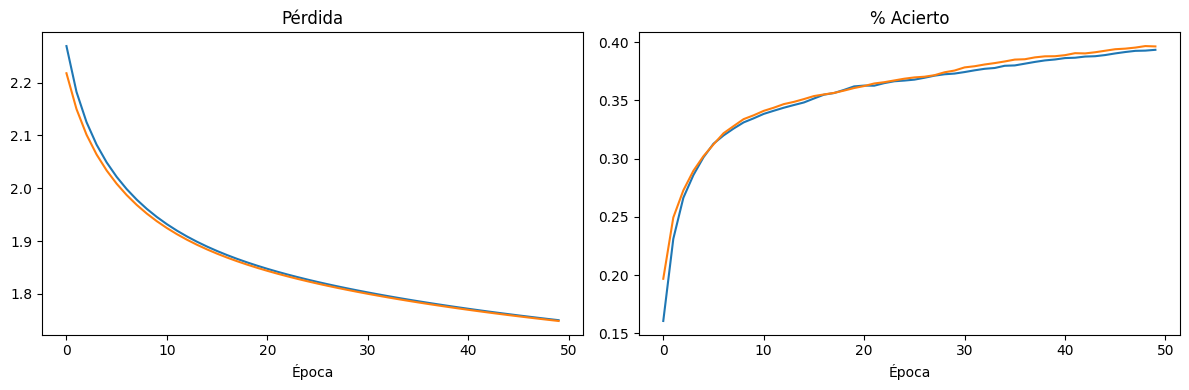

In [31]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh_1.history['accuracy'])
plt.plot(h_sgd_tanh_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh_1.history['loss'])
plt.plot(h_sgd_tanh_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.3.2. 2 Capas

In [32]:
model_sgd_tanh_2 = keras.Sequential()
model_sgd_tanh_2.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_sgd_tanh_2.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_sgd_tanh_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
sgd=SGD(learning_rate=0.01)
model_sgd_tanh_2.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)

h_sgd_tanh_2 = model_sgd_tanh_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0906 - loss: 2.3443 - val_accuracy: 0.1521 - val_loss: 2.2942
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1375 - loss: 2.2931 - val_accuracy: 0.1655 - val_loss: 2.2839
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1603 - loss: 2.2828 - val_accuracy: 0.1754 - val_loss: 2.2738
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1886 - loss: 2.2726 - val_accuracy: 0.1848 - val_loss: 2.2638
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2063 - loss: 2.2626 - val_accuracy: 0.2014 - val_loss: 2.2538
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2186 - loss: 2.2525 - val_accuracy: 0.2164 - val_loss: 2.2437
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2295 - loss: 2.2423 - val_accuracy: 0.2287 - val_loss: 2.2334
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2421 - loss: 2.2319 - val_accu

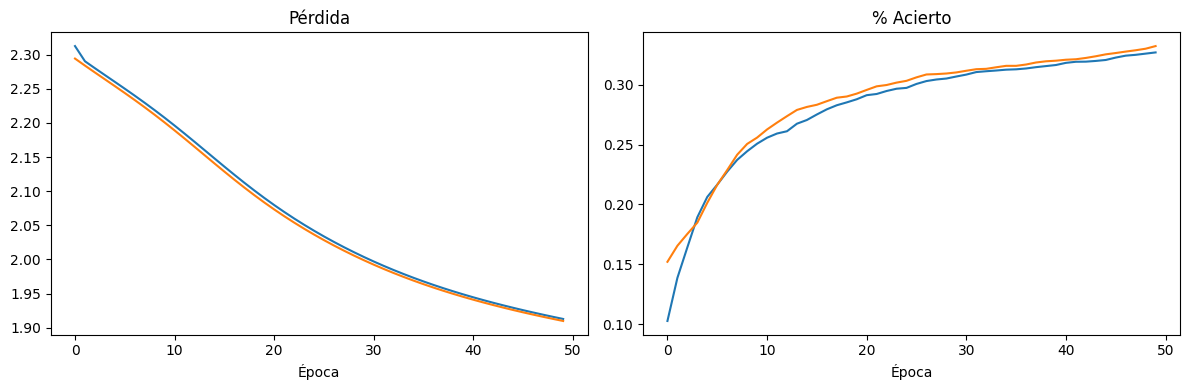

In [34]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh_2.history['accuracy'])
plt.plot(h_sgd_tanh_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh_2.history['loss'])
plt.plot(h_sgd_tanh_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.3.3. 3 Capas

In [35]:
# nuestra red feed-forward

model_sgd_tanh_3 = keras.Sequential()
model_sgd_tanh_3.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_sgd_tanh_3.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_sgd_tanh_3.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
model_sgd_tanh_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
sgd=SGD(learning_rate=0.01)
model_sgd_tanh_3.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)

h_sgd_tanh_3 = model_sgd_tanh_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1002 - loss: 2.3321 - val_accuracy: 0.1013 - val_loss: 2.3027
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1055 - loss: 2.3037 - val_accuracy: 0.1025 - val_loss: 2.3021
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1062 - loss: 2.3031 - val_accuracy: 0.1053 - val_loss: 2.3014
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1091 - loss: 2.3024 - val_accuracy: 0.1098 - val_loss: 2.3008
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1120 - loss: 2.3017 - val_accuracy: 0.1160 - val_loss: 2.3001
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1133 - loss: 2.3011 - val_accuracy: 0.1216 - val_loss: 2.2994
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1146 - loss: 2.3004 - val_accuracy: 0.1277 - val_loss: 2.2987
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1175 - loss: 2.2997 - val_accu

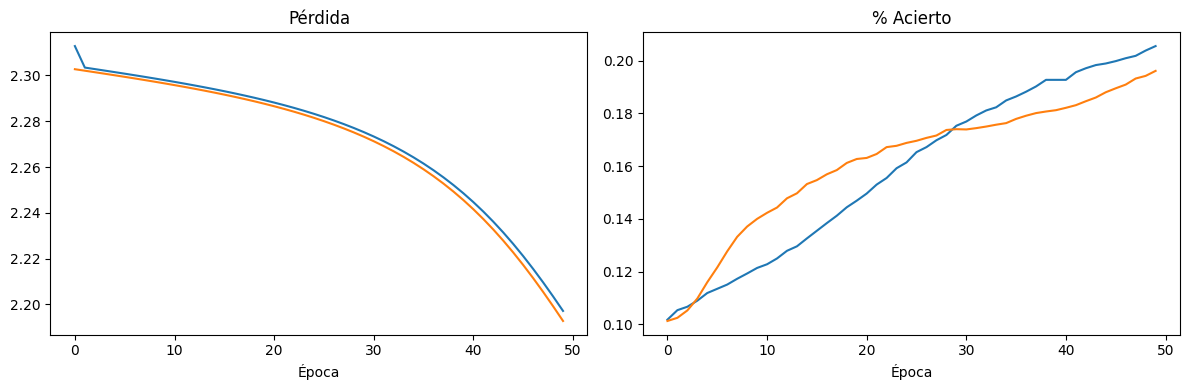

In [37]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh_3.history['accuracy'])
plt.plot(h_sgd_tanh_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh_3.history['loss'])
plt.plot(h_sgd_tanh_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 4.1.2. MODELO 2 - **ADAM**

##### *4.1.2.1. ADAM - ReLu*

###### 4.1.2.1.1. 1 Capa

In [38]:
model_adam_relu_1 = keras.Sequential()
model_adam_relu_1.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu_1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_relu_1.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_relu_1 = model_adam_relu_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1642 - loss: 3.1154 - val_accuracy: 0.2975 - val_loss: 1.9745
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.3021 - loss: 1.9611 - val_accuracy: 0.3408 - val_loss: 1.8704
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3339 - loss: 1.8771 - val_accuracy: 0.3623 - val_loss: 1.8186
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.3655 - loss: 1.8211 - val_accuracy: 0.3780 - val_loss: 1.7832
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.3761 - loss: 1.7842 - val_accuracy: 0.3892 - val_loss: 1.7478
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.3868 - loss: 1.7467 - val_accuracy: 0.3975 - val_loss: 1.7101
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3993 - loss: 1.7176 - val_accuracy: 0.4095 - val_loss: 1.6840
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.4060 - loss: 1.6909 - val_accu

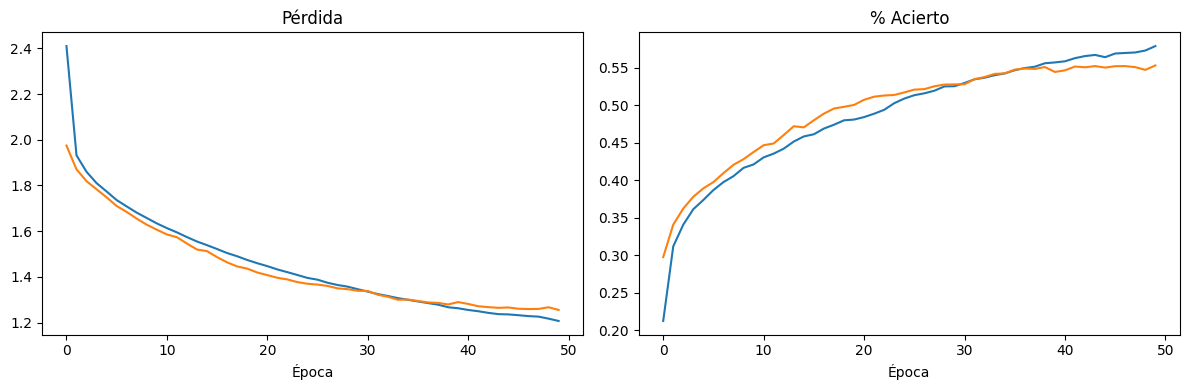

In [40]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_relu_1.history['accuracy'])
plt.plot(h_adam_relu_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_relu_1.history['loss'])
plt.plot(h_adam_relu_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.1.2. 2 Capas

In [41]:
model_adam_relu_2 = keras.Sequential()
model_adam_relu_2.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu_2.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_adam_relu_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu_2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_relu_2.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_relu_2 = model_adam_relu_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.1850 - loss: 2.3707 - val_accuracy: 0.2852 - val_loss: 1.9610
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3136 - loss: 1.9182 - val_accuracy: 0.3448 - val_loss: 1.8365
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3478 - loss: 1.8267 - val_accuracy: 0.3762 - val_loss: 1.7462
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3824 - loss: 1.7429 - val_accuracy: 0.3916 - val_loss: 1.7150
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3973 - loss: 1.6997 - val_accuracy: 0.3947 - val_loss: 1.7026
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4128 - loss: 1.6607 - val_accuracy: 0.4115 - val_loss: 1.6417
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4247 - loss: 1.6238 - val_accuracy: 0.4305 - val_loss: 1.5919
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4385 - loss: 1.5816 - val_accu

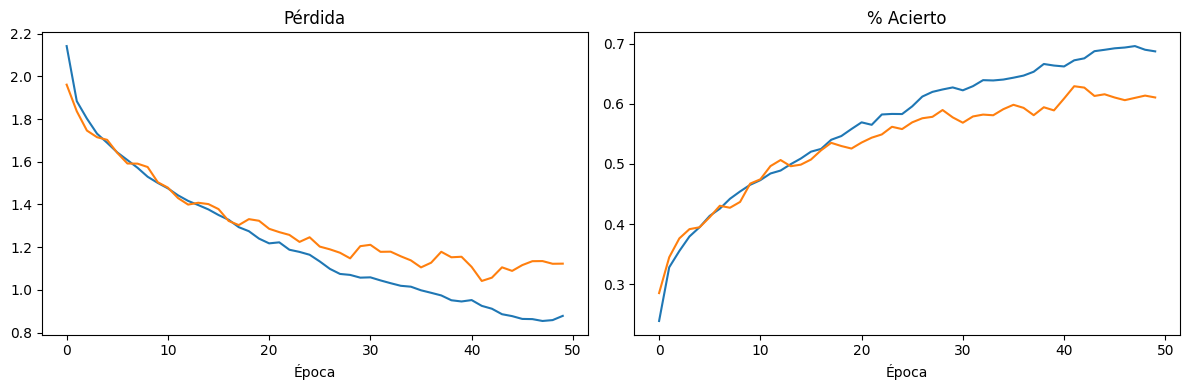

In [43]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_relu_2.history['accuracy'])
plt.plot(h_adam_relu_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_relu_2.history['loss'])
plt.plot(h_adam_relu_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.1.3. 3 Capas

In [44]:
# nuestra red feed-forward

model_adam_relu_3 = keras.Sequential()
model_adam_relu_3.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu_3.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_adam_relu_3.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
model_adam_relu_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu_3.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_relu_3.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_relu_3 = model_adam_relu_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.1709 - loss: 2.3646 - val_accuracy: 0.3140 - val_loss: 1.9116
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3088 - loss: 1.9062 - val_accuracy: 0.3778 - val_loss: 1.7472
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3636 - loss: 1.7958 - val_accuracy: 0.3844 - val_loss: 1.7067
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3835 - loss: 1.7303 - val_accuracy: 0.3870 - val_loss: 1.7183
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4031 - loss: 1.6683 - val_accuracy: 0.3874 - val_loss: 1.7122
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4112 - loss: 1.6458 - val_accuracy: 0.4191 - val_loss: 1.6199
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4330 - loss: 1.5846 - val_accuracy: 0.4377 - val_loss: 1.5724
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4560 - loss: 1.5260 - val_accu

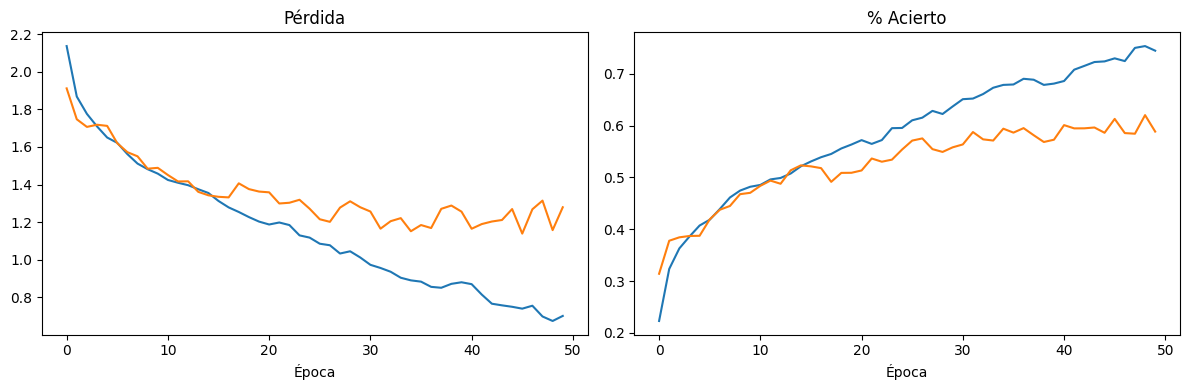

In [46]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_relu_3.history['accuracy'])
plt.plot(h_adam_relu_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_relu_3.history['loss'])
plt.plot(h_adam_relu_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.1.2.2. *ADAM - Tanh*

###### 4.1.2.2.1. 1 Capa

In [47]:

model_adam_tanh_1 = keras.Sequential()
model_adam_tanh_1.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_adam_tanh_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_tanh_1.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_tanh_1.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_tanh_1 = model_adam_tanh_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1352 - loss: 3.6917 - val_accuracy: 0.2822 - val_loss: 2.0034
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.2826 - loss: 1.9827 - val_accuracy: 0.3159 - val_loss: 1.9142
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3143 - loss: 1.9041 - val_accuracy: 0.3508 - val_loss: 1.8461
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3343 - loss: 1.8569 - val_accuracy: 0.3592 - val_loss: 1.8135
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3520 - loss: 1.8151 - val_accuracy: 0.3659 - val_loss: 1.7847
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3613 - loss: 1.7843 - val_accuracy: 0.3779 - val_loss: 1.7725
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3848 - loss: 1.7442 - val_accuracy: 0.3971 - val_loss: 1.7259
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3937 - loss: 1.7232 - val_accu

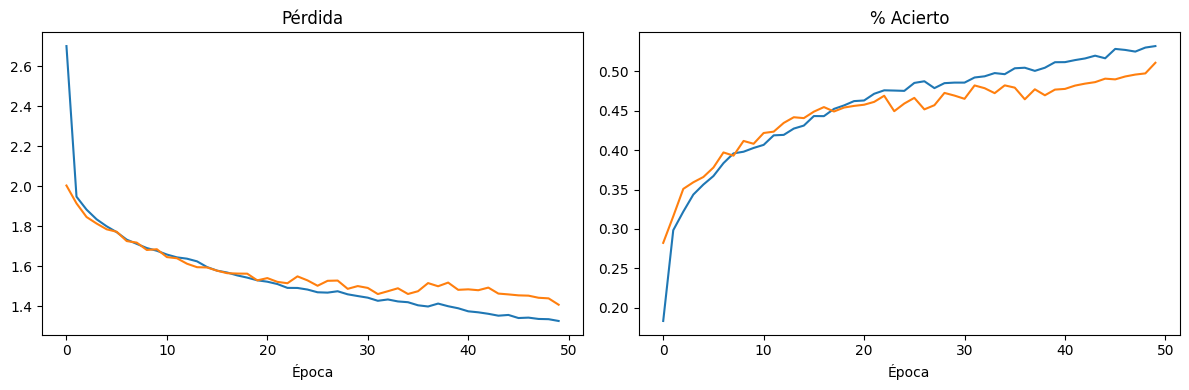

In [49]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh_1.history['accuracy'])
plt.plot(h_adam_tanh_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh_1.history['loss'])
plt.plot(h_adam_tanh_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.2.2. 2 Capas

In [50]:

model_adam_tanh_2 = keras.Sequential()
model_adam_tanh_2.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_adam_tanh_2.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_adam_tanh_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_tanh_2.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_tanh_2.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_tanh_2 = model_adam_tanh_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.1354 - loss: 2.6049 - val_accuracy: 0.2402 - val_loss: 2.0441
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.2373 - loss: 2.0308 - val_accuracy: 0.2942 - val_loss: 1.9149
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.2857 - loss: 1.9353 - val_accuracy: 0.3164 - val_loss: 1.8539
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3178 - loss: 1.8827 - val_accuracy: 0.3318 - val_loss: 1.8230
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3318 - loss: 1.8362 - val_accuracy: 0.3560 - val_loss: 1.7737
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3467 - loss: 1.8066 - val_accuracy: 0.3666 - val_loss: 1.7552
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3583 - loss: 1.7865 - val_accuracy: 0.3811 - val_loss: 1.7197
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3606 - loss: 1.7644 - val_accu

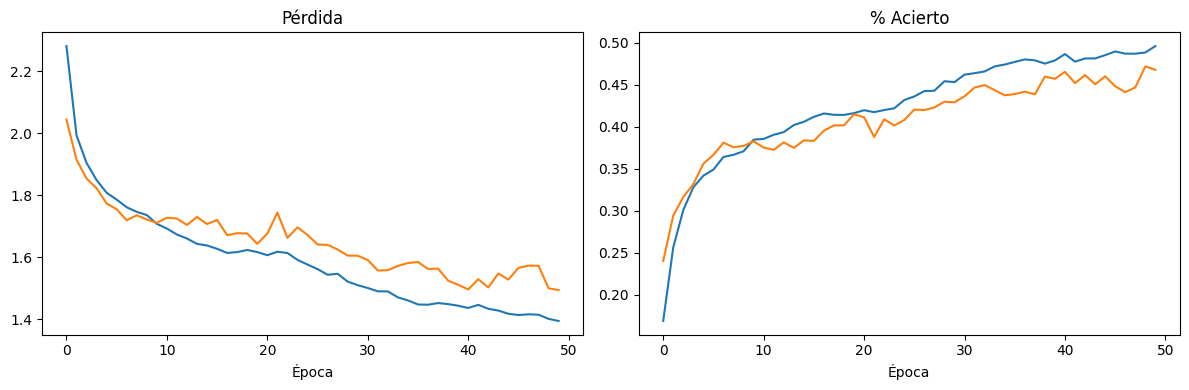

In [52]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh_2.history['accuracy'])
plt.plot(h_adam_tanh_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh_2.history['loss'])
plt.plot(h_adam_tanh_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.2.3. 3 Capas

In [53]:
# nuestra red feed-forward

model_adam_tanh_3 = keras.Sequential()
model_adam_tanh_3.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_adam_tanh_3.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_adam_tanh_3.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
model_adam_tanh_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_tanh_3.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_tanh_3.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_tanh_3 = model_adam_tanh_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.1252 - loss: 2.4964 - val_accuracy: 0.2349 - val_loss: 2.0577
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2273 - loss: 2.0362 - val_accuracy: 0.2807 - val_loss: 1.9442
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2715 - loss: 1.9677 - val_accuracy: 0.3025 - val_loss: 1.8916
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2966 - loss: 1.9232 - val_accuracy: 0.3246 - val_loss: 1.8326
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3156 - loss: 1.8803 - val_accuracy: 0.3305 - val_loss: 1.8064
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3296 - loss: 1.8347 - val_accuracy: 0.3389 - val_loss: 1.7864
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3213 - loss: 1.8405 - val_accuracy: 0.3631 - val_loss: 1.7418
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3374 - loss: 1.7965 - val_accu

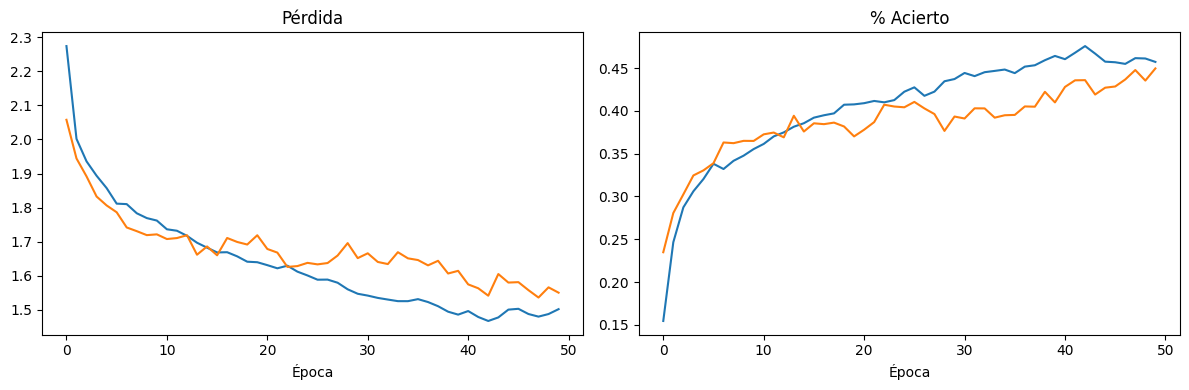

In [55]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh_3.history['accuracy'])
plt.plot(h_adam_tanh_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh_3.history['loss'])
plt.plot(h_adam_tanh_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.1.2.3. *ADAM - Sigmoid*

###### 4.1.2.3.1. 1 Capa

In [56]:
# nuestra red feed-forward

model_adam_sigmoid_1 = keras.Sequential()
model_adam_sigmoid_1.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_adam_sigmoid_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_sigmoid_1.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_sigmoid_1.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_sigmoid_1 = model_adam_sigmoid_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.1737 - loss: 2.5177 - val_accuracy: 0.3082 - val_loss: 1.9558
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3235 - loss: 1.9060 - val_accuracy: 0.3519 - val_loss: 1.8435
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3497 - loss: 1.8247 - val_accuracy: 0.3716 - val_loss: 1.7849
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3714 - loss: 1.7707 - val_accuracy: 0.3850 - val_loss: 1.7466
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3958 - loss: 1.7230 - val_accuracy: 0.3990 - val_loss: 1.7034
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4128 - loss: 1.6826 - val_accuracy: 0.4192 - val_loss: 1.6591
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4317 - loss: 1.6392 - val_accuracy: 0.4255 - val_loss: 1.6373
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4419 - loss: 1.6071 - val_accu

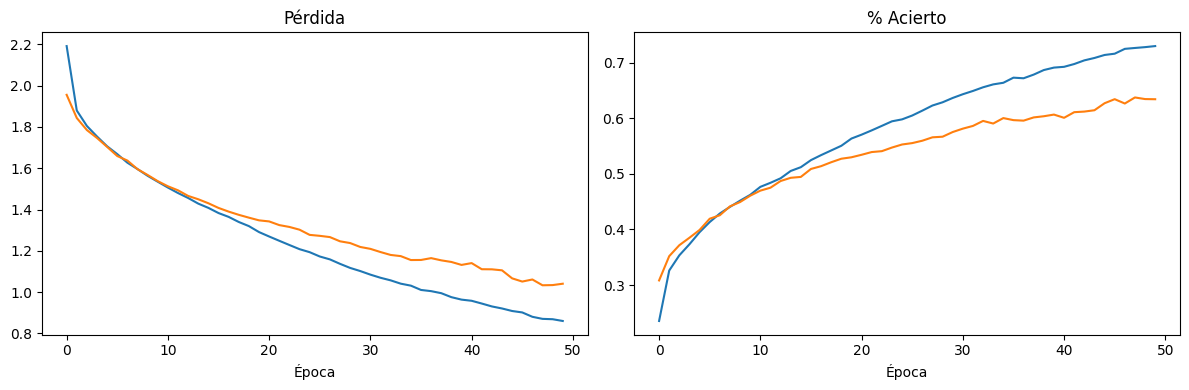

In [58]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid_1.history['accuracy'])
plt.plot(h_adam_sigmoid_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid_1.history['loss'])
plt.plot(h_adam_sigmoid_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.3.2. 2 Capas

In [59]:
# nuestra red feed-forward

model_adam_sigmoid_2 = keras.Sequential()
model_adam_sigmoid_2.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_adam_sigmoid_2.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_adam_sigmoid_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_sigmoid_2.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_sigmoid_2.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_sigmoid_2 = model_adam_sigmoid_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.1582 - loss: 2.2910 - val_accuracy: 0.2996 - val_loss: 1.9469
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.2847 - loss: 1.9465 - val_accuracy: 0.3302 - val_loss: 1.8517
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3319 - loss: 1.8563 - val_accuracy: 0.3620 - val_loss: 1.7820
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3602 - loss: 1.7865 - val_accuracy: 0.3801 - val_loss: 1.7366
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3833 - loss: 1.7304 - val_accuracy: 0.3928 - val_loss: 1.7072
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4016 - loss: 1.6819 - val_accuracy: 0.4091 - val_loss: 1.6871
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4158 - loss: 1.6429 - val_accuracy: 0.4214 - val_loss: 1.6610
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4296 - loss: 1.6072 - val_accu

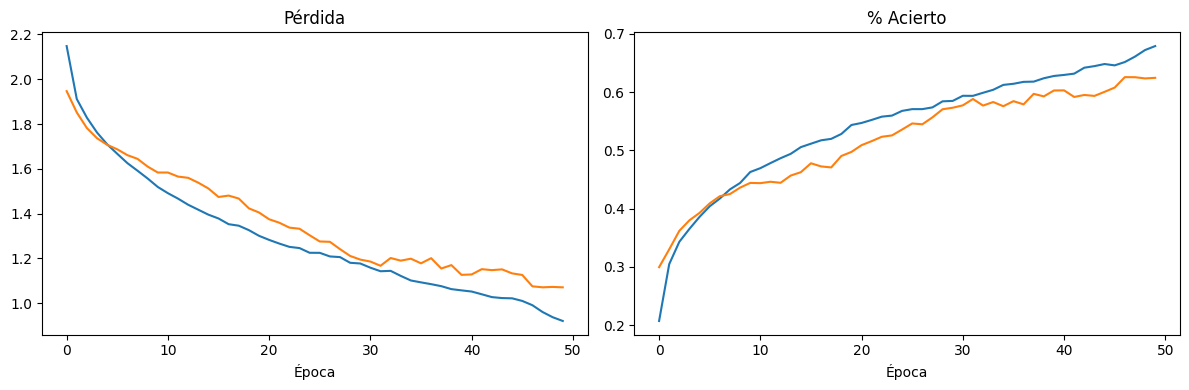

In [61]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid_2.history['accuracy'])
plt.plot(h_adam_sigmoid_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid_2.history['loss'])
plt.plot(h_adam_sigmoid_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.3.3. 3 Capas

In [62]:
# nuestra red feed-forward

model_adam_sigmoid_3 = keras.Sequential()
model_adam_sigmoid_3.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_adam_sigmoid_3.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_adam_sigmoid_3.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
model_adam_sigmoid_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_sigmoid_3.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_sigmoid_3.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_sigmoid_3 = model_adam_sigmoid_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.1276 - loss: 2.2986 - val_accuracy: 0.2257 - val_loss: 2.0398
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.2373 - loss: 2.0226 - val_accuracy: 0.2934 - val_loss: 1.9131
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.2963 - loss: 1.9227 - val_accuracy: 0.3305 - val_loss: 1.8368
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3312 - loss: 1.8528 - val_accuracy: 0.3582 - val_loss: 1.7583
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3562 - loss: 1.7830 - val_accuracy: 0.3793 - val_loss: 1.7141
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3740 - loss: 1.7374 - val_accuracy: 0.3849 - val_loss: 1.6927
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3885 - loss: 1.7009 - val_accuracy: 0.3970 - val_loss: 1.6715
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3931 - loss: 1.6674 - val_accu

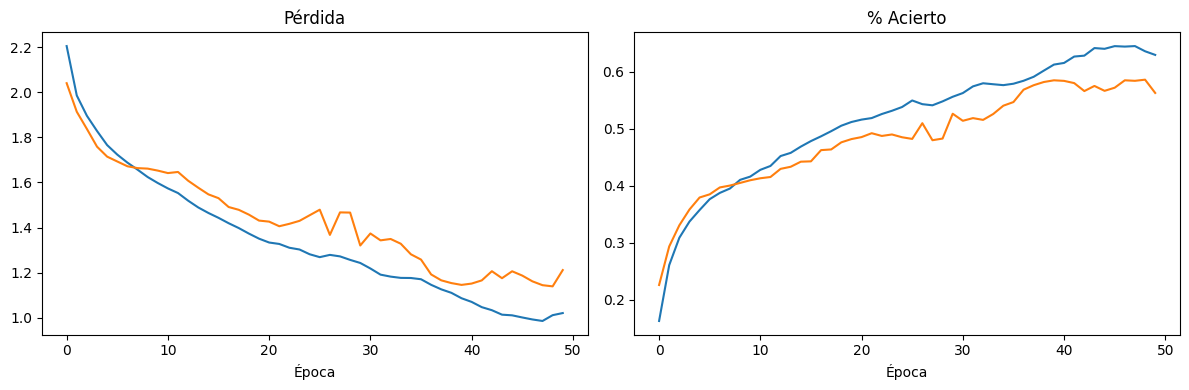

In [64]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid_3.history['accuracy'])
plt.plot(h_adam_sigmoid_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid_3.history['loss'])
plt.plot(h_adam_sigmoid_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 4.1.3. MODELO 4 - **RMsProp**

##### 4.1.3.1. *RMsProp - ReLu*

##### *4.1.3.2. RMsProp - Tanh*

##### 4.1.3.3. *RMsProp - Sigmoid*

#### 4.1.4 **Conclusiones**

$$
\begin{aligned}
& \hspace{20mm} \text  {Tabla 1.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP) }\\
&\begin{array}{cccc}
\hline \hline \text {     } & \text { ReLu } & \text { Tanh } & \text { Sigmoid } \\
\hline \hline \text {     } & \text { val_acc }\hspace{10mm}  { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } \\
\hline \text{ __ capas ocultas }& {} & {} & {} & {} & {} & {} \\
\text{ __ capas ocultas } & {} & {} & {} & {} & {} & {} \\
\text{ __ capas ocultas } & {} & {} & {} & {} & {} & {} \\
\hline
\end{array}
\end{aligned}
$$

Para completar la tabla en LaTeX seguir los siguientes pasos:

Hacer doble clic en la tabla y completar los valores dentro de las llaves de las líneas así:

* Ejemplo:\hline \text{ 2 capas ocultas }& {7.2} & {8.0} & {1.3} & {3.5} & {0.8} & {5.1}

Insertar en este espacio las conclusiones que obtuvieron tras cambiar diversos parámetros e hiperparámetros de la red construida. 
Indiquen si hubo cambios significativos en el tiempo de entrenamiento, si impactó la precisión en la clasificación y por qué cambian los tiempos de entrenamiento con una función versus otra.

### 4.2. Backpropagation

Explicar en este apartado qué es backpropagation y cuál es su función en las redes neuronales artificiales.
Cuál es la diferencia que tiene backpropagation con el descenso de gradiente y en qué consiste este último concepto. 

### 4.3. Regularización del modelo

En este apartado, incorporar al modelo construido, técnicas de regularización. Indiquen las diferencias que hay entre las técnicas de regularización y justifiquen que técnica se comportó mejor y por qué. Es importante detallar con qué arquitectura finalmente quedó nuestro modelo para irle incorporando mejoras en los siguientes items. 
Si utilizaron Early stopping, justificar y fundamentar el desempeño obtenido, si no lo utilizaron, indicar y fundamentar por qué no. 

#### 4.3.1. Regularización con DROPOUT

##### 4.3.1.1. Regularización con Dropout de MODELO 1 - SGD

###### 4.3.1.1.1. SGD + ReLu + Droput (3 capas)

In [25]:
# nuestra red feed-forward

model_sgd_relu_dropout = keras.Sequential()
model_sgd_relu_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd_relu_dropout.add(keras.layers.Dropout(0.5))
model_sgd_relu_dropout.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_sgd_relu_dropout.add(keras.layers.Dropout(0.5))
model_sgd_relu_dropout.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa'))
model_sgd_relu_dropout.add(keras.layers.Dropout(0.3))
model_sgd_relu_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_relu_dropout.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#sgd=SGD(learning_rate=0.01)
model_sgd_relu_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [27]:
h_model_sgd_relu_dropout = model_sgd_relu_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1365 - loss: 2.3098 - val_accuracy: 0.2630 - val_loss: 2.0676
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2057 - loss: 2.1140 - val_accuracy: 0.3111 - val_loss: 1.9673
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2494 - loss: 2.0292 - val_accuracy: 0.3308 - val_loss: 1.8986
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2708 - loss: 1.9806 - val_accuracy: 0.3460 - val_loss: 1.8555
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2895 - loss: 1.9459 - val_accuracy: 0.3570 - val_loss: 1.8170
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3038 - loss: 1.9122 - val_accuracy: 0.3629 - val_loss: 1.7902
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3106 - loss: 1.8905 - val_accuracy: 0.3759 - val_loss: 1.7629
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3249 - loss: 1.8663 - val_accu

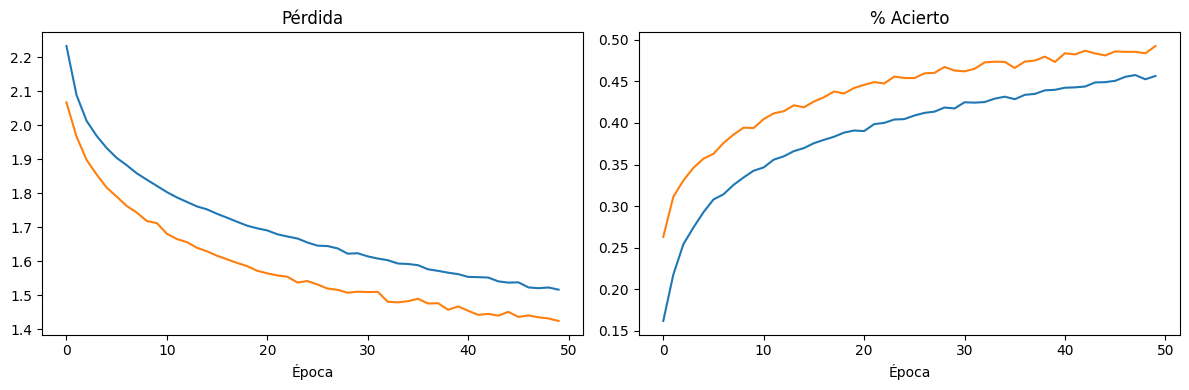

In [28]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_sgd_relu_dropout.history['accuracy'])
plt.plot(h_model_sgd_relu_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_sgd_relu_dropout.history['loss'])
plt.plot(h_model_sgd_relu_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.1.1.2. SGD + Tanh + Droput (3 capas)

In [29]:
# nuestra red feed-forward

model_sgd_tanh_dropout = keras.Sequential()
model_sgd_tanh_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_sgd_tanh_dropout.add(keras.layers.Dropout(0.5))
model_sgd_tanh_dropout.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_sgd_tanh_dropout.add(keras.layers.Dropout(0.5))
model_sgd_tanh_dropout.add(keras.layers.Dense(h2, activation='tanh', name='tercera_capa'))
model_sgd_tanh_dropout.add(keras.layers.Dropout(0.3))
model_sgd_tanh_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_dropout.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model_sgd_tanh_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_model_sgd_tanh_dropout = model_sgd_tanh_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1637 - loss: 2.3805 - val_accuracy: 0.3264 - val_loss: 1.8966
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2630 - loss: 2.0555 - val_accuracy: 0.3526 - val_loss: 1.8354
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2912 - loss: 1.9779 - val_accuracy: 0.3607 - val_loss: 1.8114
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3057 - loss: 1.9320 - val_accuracy: 0.3672 - val_loss: 1.7918
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3178 - loss: 1.9071 - val_accuracy: 0.3736 - val_loss: 1.7829
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3230 - loss: 1.8894 - val_accuracy: 0.3813 - val_loss: 1.7681
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3340 - loss: 1.8656 - val_accuracy: 0.3799 - val_loss: 1.7659
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3368 - loss: 1.8562 - val_accu

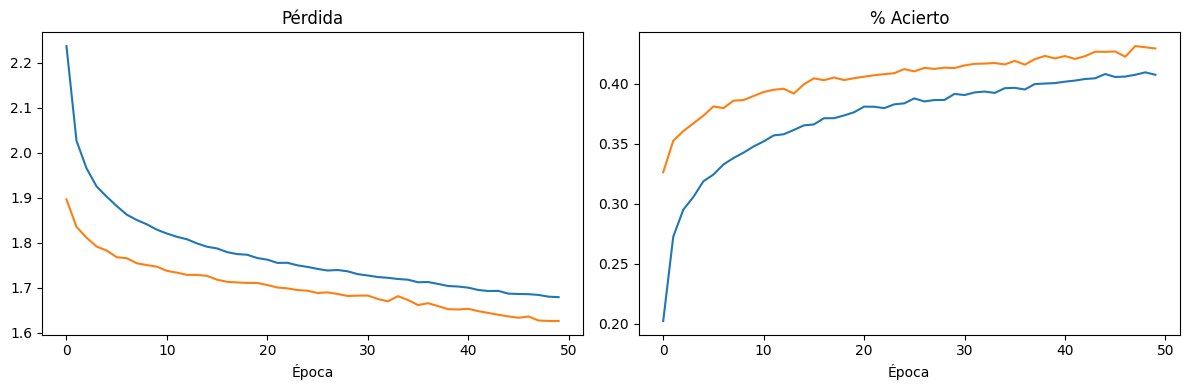

In [31]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_sgd_tanh_dropout.history['accuracy'])
plt.plot(h_model_sgd_tanh_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_sgd_tanh_dropout.history['loss'])
plt.plot(h_model_sgd_tanh_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.1.1.3. SGD + Sigmoid + Droput (1 capa)

In [32]:
# nuestra red feed-forward

model_sgd_sigmoid_dropout = keras.Sequential()
model_sgd_sigmoid_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_sgd_sigmoid_dropout.add(keras.layers.Dropout(0.5))
model_sgd_sigmoid_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_sigmoid_dropout.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_sgd_sigmoid_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_model_sgd_sigmoid_dropout = model_sgd_sigmoid_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1261 - loss: 2.4191 - val_accuracy: 0.2930 - val_loss: 2.0909
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2031 - loss: 2.1692 - val_accuracy: 0.3128 - val_loss: 2.0217
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2441 - loss: 2.0797 - val_accuracy: 0.3255 - val_loss: 1.9782
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2583 - loss: 2.0378 - val_accuracy: 0.3348 - val_loss: 1.9487
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2744 - loss: 2.0092 - val_accuracy: 0.3379 - val_loss: 1.9268
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2825 - loss: 1.9887 - val_accuracy: 0.3435 - val_loss: 1.9098
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2913 - loss: 1.9700 - val_accuracy: 0.3459 - val_loss: 1.8959
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3016 - loss: 1.9520 - val_accura

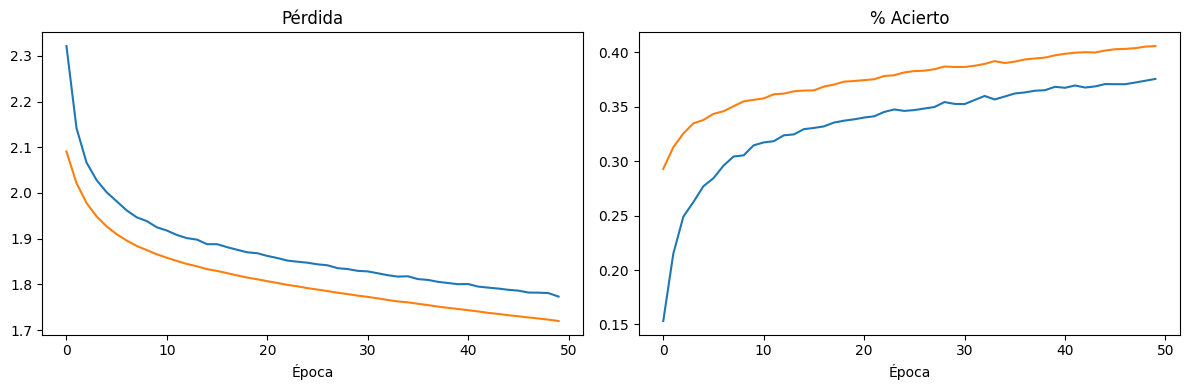

In [34]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_sgd_sigmoid_dropout.history['accuracy'])
plt.plot(h_model_sgd_sigmoid_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_sgd_sigmoid_dropout.history['loss'])
plt.plot(h_model_sgd_sigmoid_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 4.3.1.2. Regularización con Dropout de MODELO 2 - ADAM

###### 4.3.2.1. ADAM + ReLu + Dropout (3 capas)

In [14]:
# nuestra red feed-forward

model_adam_relu_dropout = keras.Sequential()
model_adam_relu_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu_dropout.add(keras.layers.Dropout(0.5))
model_adam_relu_dropout.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_adam_relu_dropout.add(keras.layers.Dropout(0.5))
model_adam_relu_dropout.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa'))
model_adam_relu_dropout.add(keras.layers.Dropout(0.3))
model_adam_relu_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#sgd=SGD(learning_rate=0.01)
model_adam_relu_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_model_adam_relu_dropout = model_adam_relu_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50


2024-05-08 20:04:26.531620: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1491 - loss: 2.2906

2024-05-08 20:04:38.318064: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.1493 - loss: 2.2899 - val_accuracy: 0.2502 - val_loss: 2.0323
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.2078 - loss: 2.0686 - val_accuracy: 0.2842 - val_loss: 1.9919
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.2196 - loss: 2.0393 - val_accuracy: 0.2881 - val_loss: 1.9969
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2322 - loss: 2.0089 - val_accuracy: 0.2685 - val_loss: 1.9996
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2324 - loss: 2.0184 - val_accuracy: 0.2569 - val_loss: 2.0120
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2371 - loss: 2.0051 - val_accuracy: 0.2587 - val_loss: 1.9766
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2396 - loss: 1.9893 - val_accuracy: 0.2693 - val_loss: 1.9890
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.2454 - loss: 1.9881 - val_accuracy:

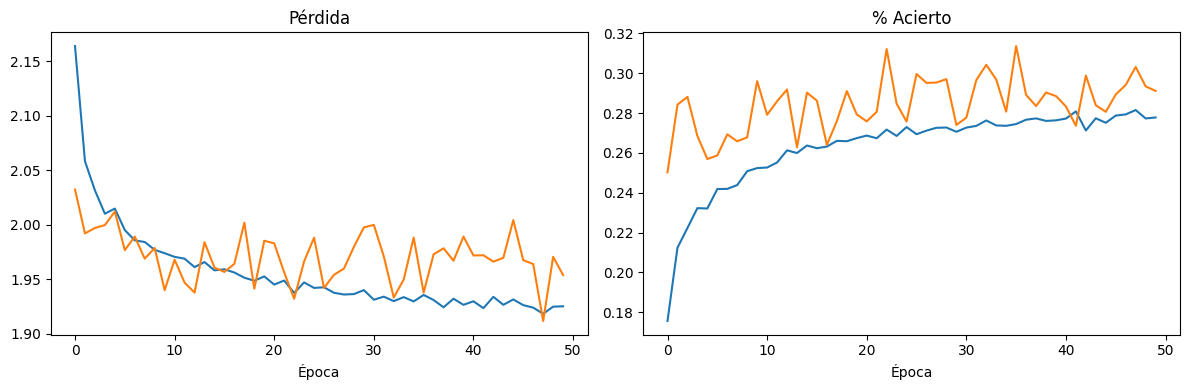

In [16]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_adam_relu_dropout.history['accuracy'])
plt.plot(h_model_adam_relu_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_adam_relu_dropout.history['loss'])
plt.plot(h_model_adam_relu_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.2. ADAM + Tanh (1 capa)

In [35]:
# nuestra red feed-forward

model_adam_tanh_dropout = keras.Sequential()
model_adam_tanh_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_adam_tanh_dropout.add(keras.layers.Dropout(0.5))
model_adam_tanh_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_tanh_dropout.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_adam_tanh_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_adam_tanh_dropout = model_adam_tanh_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

In [ ]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh_dropout.history['accuracy'])
plt.plot(h_adam_tanh_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh_dropout.history['loss'])
plt.plot(h_adam_tanh_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.3. ADAM + Sigmoid (1 capa)

In [ ]:
# nuestra red feed-forward

model_adam_sigmoid_dropout = keras.Sequential()
model_adam_sigmoid_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_adam_sigmoid_dropout.add(keras.layers.Dropout(0.5))
model_adam_sigmoid_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_sigmoid_dropout.summary()

In [ ]:
model_adam_sigmoid_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_adam_sigmoid_dropout = model_adam_sigmoid_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

In [ ]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid_dropout.history['accuracy'])
plt.plot(h_adam_sigmoid_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid_dropout.history['loss'])
plt.plot(h_adam_sigmoid_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 4.3.2 Regularización con EarlyStopping

##### 4.3.2.1. Regularización con EarlyStopping de MODELO 2 - ADAM + EarlyStopping

###### 4.3.2.1.1. ADAM + ReLu (3 capas)

In [18]:
# nuestra red feed-forward

es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

model_adam_relu_earlystopping = keras.Sequential()
model_adam_relu_earlystopping.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu_earlystopping.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_adam_relu_earlystopping.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa'))
model_adam_relu_earlystopping.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu_earlystopping.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model_adam_relu_earlystopping.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

h_adam_relu_earlystopping = model_adam_relu_earlystopping.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test),
        callbacks=[es]
)

In [ ]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_relu_earlystopping.history['accuracy'])
plt.plot(h_adam_relu_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_relu_earlystopping.history['loss'])
plt.plot(h_adam_relu_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

Justificar y hacer análisis aquí.

### 5. EVALUATION

#### 5.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP)

##### 5.1.1. SGD

$$
\begin{aligned}
& \hspace{20mm} \text  {Tabla 1.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP) }\\
&\begin{array}{cccc}
\hline \hline \text {     } & \text { ReLu } & \text { Tanh } & \text { Sigmoid } \\
\hline \hline \text {     } & \text { val-acc }\hspace{10mm}  { tiempo-s } & \text { val-acc }\hspace{10mm} { tiempo-s } & \text { val-acc }\hspace{10mm} { tiempo-s } \\
\hline \text{ 1 capa oculta }& \text{54,35} & \text{3} & \text{50,59} & \text{x} & {39,63} & \text{x} \\
\text{ 2 capas ocultas } & \text{56,19} & \text{asdf} & \text{53,66} & \text{asdf} & \text{32,32} & \text{x} \\
\text{ 3 capas ocultas } & \text{57,46} & \text{asdf} & \text{54,33} & \text{asdf} & \text{20,43} & \text{x} \\
\hline
\end{array}
\end{aligned}
$$

##### 5.1.2. ADAM

$$
\begin{aligned}
& \hspace{20mm} \text  {Tabla 1.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP) }\\
&\begin{array}{cccc}
\hline \hline \text {     } & \text { ReLu } & \text { Tanh } & \text { Sigmoid } \\
\hline \hline \text {     } & \text { val-acc }\hspace{10mm}  { tiempo-s } & \text { val-acc }\hspace{10mm} { tiempo-s } & \text { val-acc }\hspace{10mm} { tiempo-s } \\
\hline \text{ 1 capa oculta }& {54,56} & {} & {} & {} & {} & {} \\
\text{ 2 capas ocultas } & {} & {} & {} & {} & {} & {} \\
\text{ 3 capas ocultas } & {} & {} & {} & {} & {} & {} \\
\hline
\end{array}
\end{aligned}
$$

### 5.2. Optimizadores y Normalización 

En este apartado utilizar y fundamentar los diferentes optimizadores, cuál se desempeñó mejor, la arquitectura de red que seleccionaron para trabajar. 
Registrar en la siguiente tabla los valores correspondientes a la mejor ejecución obtenida. 

$$
\begin{aligned}
& \hspace{60mm} \text {Tabla 1.2. Comparando Optimizadores }\\
&\begin{array}{cccc}
\hline \hline \text {  N° Capas  } & \text { N° Épocas } & \text { SGD } & \text { ADAM } & \text { RMsProp } & \text { Otro* } \\
\hline \hline \text {    } & \text {  } & \text { val-acc }\hspace{10mm} \text { Loss } & \text { val-acc }\hspace{10mm} \text{ Loss } & \text { val-acc }\hspace{10mm} \text { Loss } & \text { val-acc }\hspace{10mm} \text { Loss }\\
\hline \text{ 3 capas } & \text { 50 epocas} & {} & {} & {} & {} & {} & {} & {} & {}\\
\hline
\end{array}
\end{aligned}
$$

*Especificar el nombre del optimizador

Fundamentar la importancia que tienen las funciones de optimización, en qué influye escoger el optimizador adecuado para el modelo basándose en el desempeño y en la tasa de aprendizaje fija versus una adaptativa.